<font size = '6'> *The Daisyworld Model* </font>


In [ ]:
import math
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#############################################################
##### ALL TEMP VALUES IN THIS SIMULATION ARE IN KELVIN  #####
# Doing the math in Celsius results in negative sq roots in #
# some calculations, which requires taking absolute values  #
# and only complicates the code further. Sticking to Kelvin #
# avoids such uncessary troubles.                           #
#############################################################

# Constants and Fixed values
albedo_white = .75
albedo_ground = .5
albedo_black = .25

SBc = 5.67 * 10**-8
flux = 917
death_rate = 0.3   # Rate at which daisies die
q = 0.2*flux/SBc   # Constant for T_local calculations, **needs to multiply by Luminousity!!**
Tmin = 5+273           # Value is in Kelvin
Tmax = 40+273          # Value is in Kelvin

<div class="alert alert-info">
  <h1> 3.1 Plotting one daisy's coverage (A_w / A_b) over time (t) (1DM) </h1> Use Euler's method to simluate Daisyworld containing only white daisies. Do the same for black daisies too.
</div>

In [118]:
def albedo_planet(area_w, area_b): # Planet's albedo
    return (1 - area_w - area_b)*albedo_ground + area_w*albedo_white + area_b*albedo_black

def T_eff(Lum, albedo_p):                              # Planet's Temperature
    return ( Lum*flux*(1-albedo_p)/SBc )**0.25         # value is in Kelvin

def T_local(Lum, albedo_p, albedo_local):              # Daisy's local temperature, albedo_local is the relevant daisy's albedo
    # print(Lum*q*(albedo_p - albedo_local), T_eff(Lum, albedo_p)**4, (T_eff(Lum, albedo_p)+273)**4)
    return ( Lum*q*(albedo_p - albedo_local) + T_eff(Lum, albedo_p)**4 )**0.25  # value is in Kelvin

def growth_rate(T_local):
    if T_local>=Tmin and T_local<=Tmax:
        growth = 1-0.003265*(22.5+273.15 -T_local)**2
    else:
        growth = 0
    return growth

def euler_daisies(area_w_0, area_b_0, no_of_iterations, final_t, Luminosity=1):
    delta_t = final_t/no_of_iterations
    t, area_w, area_b = 0, area_w_0, area_b_0
    
    area_w_list = [area_w]
    area_b_list = [area_b]
    eff_temperature_list_K = [T_eff(Luminosity, albedo_planet(area_w, area_b))] 
    t_list = [t]
    
    while t < final_t:
        albedo_planet_loop = albedo_planet(area_w, area_b)
        T_local_loop_w = T_local(Luminosity, albedo_planet_loop, albedo_white)
        T_local_loop_b = T_local(Luminosity, albedo_planet_loop, albedo_black)      
        growth_rate_loop_w = growth_rate(T_local_loop_w)
        growth_rate_loop_b = growth_rate(T_local_loop_b)
        
        """
        print(T_local_loop_w, growth_rate_loop_w)
        print(T_local_loop_b, growth_rate_loop_b)
        print('\n') """
        
        dwdt = area_w*((1-area_w-area_b)*growth_rate_loop_w - death_rate)
        dbdt = area_b*((1-area_w-area_b)*growth_rate_loop_b - death_rate)
        area_w += dwdt*delta_t
        area_b += dbdt*delta_t
        T_eff_loop = T_eff(Luminosity, albedo_planet(area_w, area_b))
        t += delta_t
        
        # print(area_w, area_b, dwdt, dbdt)
        
        
        area_w_list.append(area_w)
        area_b_list.append(area_b)
        eff_temperature_list_K.append(T_eff_loop)
        t_list.append(t)
    return t_list, area_w_list, area_b_list, eff_temperature_list_K

<div class="alert alert-info">
  <h1> 3.2 Plotting planet temperature ($T_p$) against time ($t$) </h1> 
    We have already calculated the temperature of a black/white daisy-only planet as well. Plot the graphs and observe the planet temperatures of black-only and white-only planets against time.
</div>

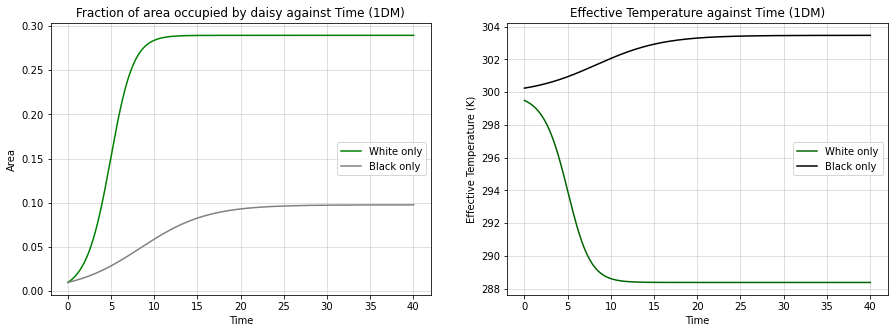

In [350]:
# Initial conditions, values of 0.01 allows for nicer area graphs
area_w_only_start = 0.01
area_b_only_start = 0.01

Time_list, Area_w_only_list, NIL, Eff_temperature_list_w_K = euler_daisies(area_w_only_start, 0, 1000, 40)
Time_list, NIL, Area_b_only_list, Eff_temperature_list_b_K = euler_daisies(0, area_b_only_start, 1000, 40)  

# Plotting both graphs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

ax[0].set_title('Fraction of area occupied by daisy against Time (1DM)')
ax[0].plot(Time_list, Area_w_only_list, color='green', label='White only')
ax[0].plot(Time_list, Area_b_only_list, color='grey', label='Black only')
ax[0].set_ylabel('Area')

ax[1].set_title('Effective Temperature against Time (1DM)')
ax[1].plot(Time_list, Eff_temperature_list_w_K, color='darkgreen', label='White only')
ax[1].plot(Time_list, Eff_temperature_list_b_K, color='black', label='Black only')
ax[1].set_ylabel('Effective Temperature (K)')

for i in range(2):
    ax[i].grid(alpha=.5)
    ax[i].set_xlabel('Time')
    ax[i].legend(loc='center right')

<div class="alert alert-info">
  <h1> 4.1 Building a two-daisy model (2DM) </h1> 
    Abrakadabra Alakazam!
</div>

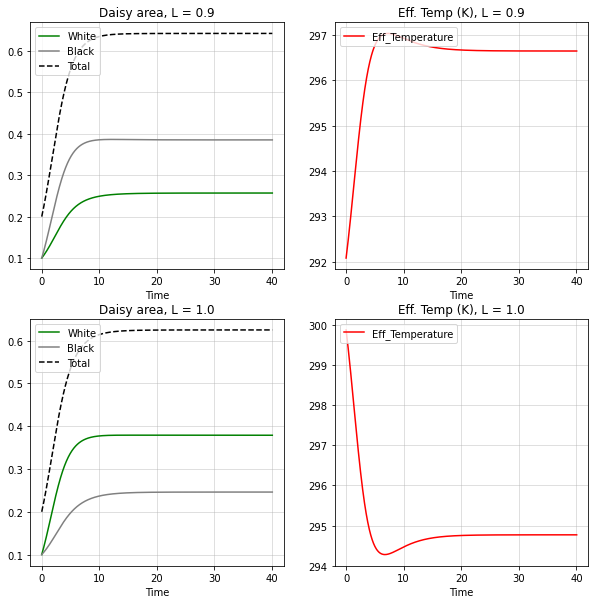

In [351]:
# Initial conditions
area_w_double_start = 0.1
area_b_double_start = 0.1

# Magic
Time_list1, Area_w_double1, Area_b_double1, Eff_temperature_list_double1_K = euler_daisies(
    area_w_double_start, area_b_double_start, 1000, 40, 0.9)    
Time_list2, Area_w_double2, Area_b_double2, Eff_temperature_list_double2_K = euler_daisies(
    area_w_double_start, area_b_double_start, 1000, 40, 1)

# Creating listsfor combined area of daisies given value of L
Area_all_daisies1 = []
Area_all_daisies2 = []
for i in range(len(Area_w_double1)):
    Area_all_daisies1.append(Area_w_double1[i] + Area_b_double1[i])
for i in range(len(Area_w_double2)):
    Area_all_daisies2.append(Area_w_double2[i] + Area_b_double2[i])

# Plotting graphs
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

ax[0,0].set_title('Daisy area, L = 0.9')
ax[0,0].plot(Time_list1, Area_w_double1, color='green', label='White')
ax[0,0].plot(Time_list1, Area_b_double1, color='grey', label='Black')
ax[0,0].plot(Time_list1, Area_all_daisies1, linestyle='--', color='black', label='Total')

ax[0,1].set_title('Eff. Temp (K), L = 0.9')
ax[0,1].plot(Time_list1, Eff_temperature_list_double1_K, color='red', label='Eff_Temperature')
#ax[0,1].hlines(y=max(Eff_temperature_list_double1_K), xmin=min(Time_list1), xmax=max(Time_list1), color='black', 
#           linestyle='dotted', label=str(round(max(Eff_temperature_list_double1_K),1))+'K')

ax[1,0].set_title('Daisy area, L = 1.0')
ax[1,0].plot(Time_list2, Area_w_double2, color='green', label='White')
ax[1,0].plot(Time_list2, Area_b_double2, color='grey', label='Black')
ax[1,0].plot(Time_list1, Area_all_daisies2, linestyle='--', color='black', label='Total')

ax[1,1].set_title('Eff. Temp (K), L = 1.0')
ax[1,1].plot(Time_list2, Eff_temperature_list_double2_K, color='red', label='Eff_Temperature')
#ax[1,1].hlines(y=min(Eff_temperature_list_double2_K), xmin=min(Time_list2), xmax=max(Time_list2), color='black', 
#           linestyle='dotted', label=str(round(min(Eff_temperature_list_double2_K),1))+'K')

list_ax = [[0,0],[0,1],[1,0],[1,1]]
for i in list_ax:
    x,y = i
    ax[x,y].grid(alpha=.5)
    ax[x,y].legend(loc='upper left')
    ax[x,y].set_xlabel('Time')

<div class="alert alert-info">
  <h1> 5.1 Planet temperature ($T_p$) and daisy's coverage ($A_w$, $A_b$) with change in luminosity ($L$)) </h1> 
    Increase $L$ from [0.5 to 1.6] and decreasing from [1.6 to 0.5]. Plot two graphs, $A_w$ and $A_b$ against $L$ (in the same graph) and $T_p$ against $L$.
</div>

In [392]:
# changing luminosity
def euler_daisies_lum_changing(start_lum, end_lum, interval, area_w_0, area_b_0, no_of_iterations, final_t, min_area=0.01):
    areaw, areab = area_w_0, area_b_0
    range_of_L = np.linspace(start_lum, end_lum, interval)
    delta_t = final_t/no_of_iterations
    
    area_w_list_lum, area_b_list_lum, eff_temperature_list_K_lum = [], [], []
    L_values_list = []
    
    for L in range_of_L:
        t = 0
        # The below function chooses the max value between arg1 and arg2. Since we are limiting the min area to be
        # either the previous steady state value or the starting value, we can use a max() funciton that selects between
        # the greater of the two values. The selected value is now used for the next L value for loop.
        areaw = max(areaw, min_area) 
        areab = max(areab, min_area) 
        
        while t < final_t:
            albedo_planet_loop = albedo_planet(areaw, areab)
            T_local_loop_w = T_local(L, albedo_planet_loop, albedo_white)
            T_local_loop_b = T_local(L, albedo_planet_loop, albedo_black)      
            growth_rate_loop_w = growth_rate(T_local_loop_w)
            growth_rate_loop_b = growth_rate(T_local_loop_b)

            dwdt = areaw*((1-areaw-areab)*growth_rate_loop_w - death_rate)
            dbdt = areab*((1-areaw-areab)*growth_rate_loop_b - death_rate)
            areaw += dwdt*delta_t
            areab += dbdt*delta_t
            T_eff_loop = T_eff(L, albedo_planet(areaw, areab))
            t += delta_t
            
        area_w_list_lum.append(areaw)
        area_b_list_lum.append(areab)
        eff_temperature_list_K_lum.append(T_eff_loop)
        L_values_list.append(L)
    return area_w_list_lum, area_b_list_lum, eff_temperature_list_K_lum, L_values_list 

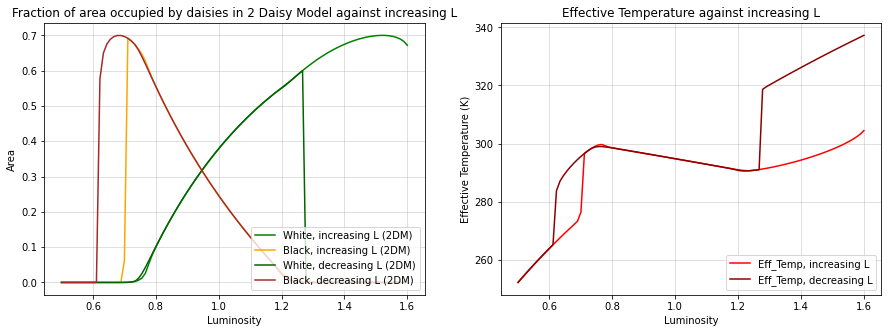

In [375]:
# Initial conditions 
area_w_lum_start = 0.1
area_b_lum_start = 0.1

# Magic
Area_w_lum, Area_b_lum, Eff_temperature_list_lum_K, L_values_list_lum = euler_daisies_lum_changing(
    0.5, 1.6, 100, area_w_lum_start, area_b_lum_start, 1000, 40)
Area_w_lum_rev, Area_b_lum_rev, Eff_temperature_list_lum_rev_K, L_values_list_lum_rev = euler_daisies_lum_changing(
    1.6, 0.5, 100, area_w_lum_start, area_b_lum_start, 1000, 40)

# Plotting graphs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

ax[0].set_title('Fraction of area occupied by daisies in 2 Daisy Model against increasing L')
ax[0].set_ylabel('Area')
ax[0].plot(L_values_list_lum, Area_w_lum, color='green', label='White, increasing L (2DM)')
ax[0].plot(L_values_list_lum, Area_b_lum, color='orange', label='Black, increasing L (2DM)')
ax[0].plot(L_values_list_lum_rev, Area_w_lum_rev, color='darkgreen', label='White, decreasing L (2DM)')
ax[0].plot(L_values_list_lum_rev, Area_b_lum_rev, color='brown', label='Black, decreasing L (2DM)')

ax[1].set_title('Effective Temperature against increasing L')
ax[1].set_ylabel('Effective Temperature (K)')
ax[1].plot(L_values_list_lum, Eff_temperature_list_lum_K, color='red', label='Eff_Temp, increasing L')
ax[1].plot(L_values_list_lum_rev, Eff_temperature_list_lum_rev_K, color='darkred', label='Eff_Temp, decreasing L')

for i in range(2):
    ax[i].grid(alpha=.5)
    ax[i].set_xlabel('Luminosity')
    ax[i].legend(loc='lower right')

<div class="alert alert-info">
  <h1> 5.2 [EXTRA] Planet temperature (T_p) and 1 daisy's coverage (A_w, A_b) with change in luminosity (L)) (1DM) </h1> 
    Increase L from [0.5 to 1.6] and decreasing from [1.6 to 0.5]. Plot the graphs for area and temperature and observe the variations of black-only and white-only planets against time.
</div>

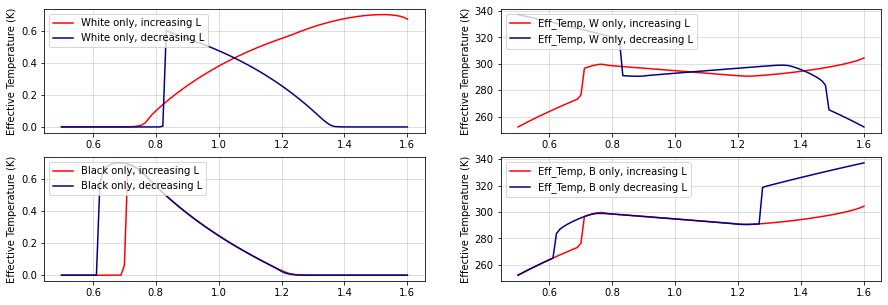

In [403]:
# Initial conditions
area_w_only_lum_start = 0.1
area_b_only_lum_start = 0.1

# Magic
Area_w_only_lum_up, NIL, Eff_temperature_list_w_only_lum_up_K, L_values_list_lum_up = euler_daisies_lum_changing(
    0.5, 1.6, 100, area_w_only_lum_start, 0, 1000, 40)
Area_w_only_lum_down, NIL, Eff_temperature_list_w_only_lum_down_K, L_values_list_lum_down = euler_daisies_lum_changing(
    1.6, 0.5, 100, area_w_only_lum_start, 0, 1000, 40)
NIL, Area_b_only_lum_up, Eff_temperature_list_b_only_lum_up_K, L_values_list_lum_up = euler_daisies_lum_changing(
    0.5, 1.6, 100, 0, area_b_only_lum_start, 1000, 40)
NIL, Area_b_only_lum_down, Eff_temperature_list_b_only_lum_down_K, L_values_list_lum_down = euler_daisies_lum_changing(
    1.6, 0.5, 100, 0, area_b_only_lum_start, 1000, 40)

# Plotting graphs
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,5))

ax[0,0].plot(L_values_list_lum_up, Area_w_only_lum_up, color='red', label='White only, increasing L')
ax[0,0].plot(L_values_list_lum, Area_w_only_lum_down, color='darkblue', label='White only, decreasing L')
ax[0,1].plot(L_values_list_lum_up, Eff_temperature_list_w_only_lum_up_K, color='red', label='Eff_Temp, W only, increasing L')
ax[0,1].plot(L_values_list_lum, Eff_temperature_list_w_only_lum_down_K, color='darkblue', label='Eff_Temp, W only, decreasing L')

ax[1,0].plot(L_values_list_lum_up, Area_b_only_lum_up, color='red', label='Black only, increasing L')
ax[1,0].plot(L_values_list_lum_down, Area_b_only_lum_down, color='darkblue', label='Black only, decreasing L')
ax[1,1].plot(L_values_list_lum_up, Eff_temperature_list_b_only_lum_up_K, color='red', label='Eff_Temp, B only, increasing L')
ax[1,1].plot(L_values_list_lum_down, Eff_temperature_list_b_only_lum_down_K, color='darkblue', label='Eff_Temp, B only decreasing L')



list_ax = [[0,0],[0,1],[1,0],[1,1]]
for i in list_ax:
    x,y = i
    ax[x,y].grid(alpha=.5)
    ax[x,y].set_ylabel('Effective Temperature (K)')
    ax[x,y].legend(loc='upper left')

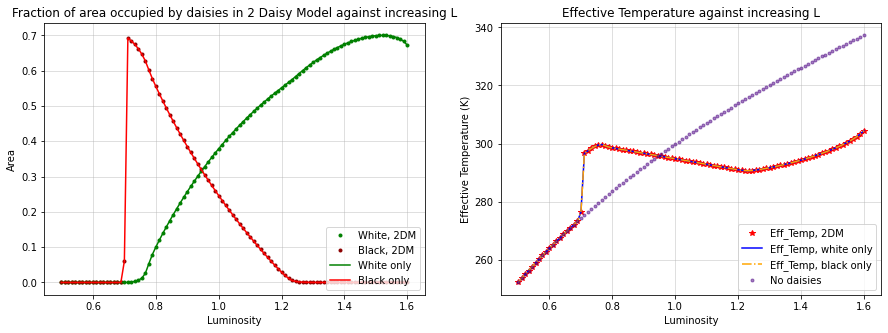

In [413]:
# Initial conditions
area_w_lum_start = 0.01
area_b_lum_start = 0.01

# Magic
Area_w_lum, Area_b_lum, Eff_temperature_list_lum_K, L_values_list_lum = euler_daisies_lum_changing(
    0.5, 1.6, 100, area_w_lum_start, area_b_lum_start, 1000, 40)
Area_w_lum_none, Area_b_lum_none, Eff_temperature_list_lum_none_K, L_values_list_lum_none = euler_daisies_lum_changing(
    0.5, 1.6, 100, 0, 0, 1000, 40, min_area=0)

# Plotting graphs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

ax[0].set_title('Fraction of area occupied by daisies in 2 Daisy Model against increasing L')
ax[0].plot(L_values_list_lum, Area_w_lum, '.', color='green', label='White, 2DM')
ax[0].plot(L_values_list_lum, Area_b_lum, '.', color='darkred', label='Black, 2DM')
ax[0].set_ylabel('Area')

ax[1].set_title('Effective Temperature against increasing L')
ax[1].plot(L_values_list_lum, Eff_temperature_list_lum_K, '*', color='red', label='Eff_Temp, 2DM')
ax[1].set_ylabel('Effective Temperature (K)')

ax[0].plot(L_values_list_lum, Area_w_only_lum_up, color='green', label='White only')
ax[0].plot(L_values_list_lum, Area_b_only_lum_up, color='red', label='Black only')
ax[1].plot(L_values_list_lum, Eff_temperature_list_w_only_lum_up_K, color='blue', label='Eff_Temp, white only')
ax[1].plot(L_values_list_lum, Eff_temperature_list_b_only_lum_up_K, linestyle='-.', color='orange', label='Eff_Temp, black only')
ax[1].plot(L_values_list_lum_none, Eff_temperature_list_lum_none_K, '.', color='indigo', label='No daisies', alpha=.5)

for i in range(2):
    ax[i].grid(alpha=.5)
    ax[i].set_xlabel('Luminosity')
    ax[i].legend(loc='lower right')